In [83]:
# to handle datasets
import pandas as pd
import numpy as np
 
# for text / string processing
import re
 
# for plotting
import matplotlib.pyplot as plt
% matplotlib inline
 
# to divide train and test set
from sklearn.model_selection import train_test_split
 
# feature scaling
from sklearn.preprocessing import MinMaxScaler
 
# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
 
 
# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
 
pd.pandas.set_option('display.max_columns', None)
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# let's inspect the type of variables in pandas
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype =='O']
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [5]:
numerical = [var for var in data.columns if data[var].dtype != 'O']
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
numerical = [var for var in numerical if var not in['Survived', 'PassengerId']]
numerical

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Text(0,0.5,'Fare')

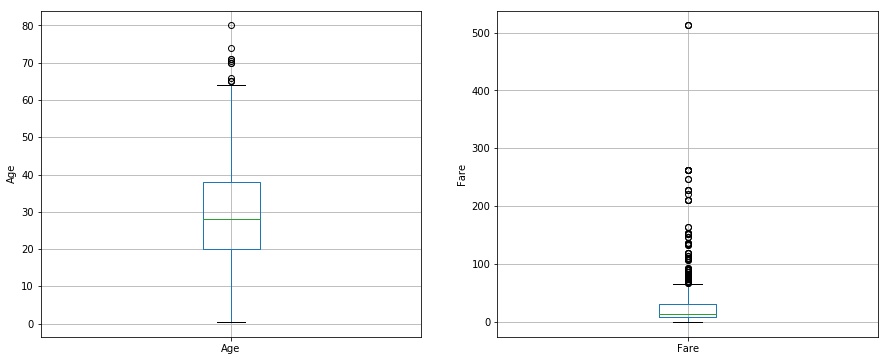

In [8]:
# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare
# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare
 
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')
 
plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

Text(0.5,0,'Fare')

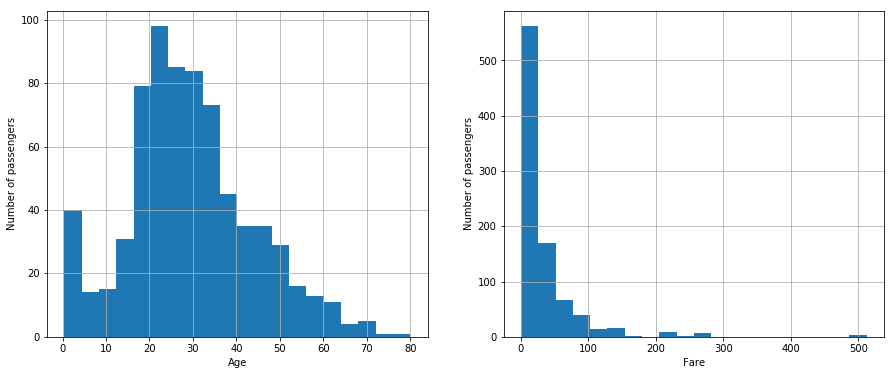

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins = 20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')
 
plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins = 20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [10]:
# find outliers
 
# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
 
# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -13.8803743499 or > 73.2786096441
Fare outliers are values < -61.3584 or > 100.2688


In [11]:
for var in ['Pclass', 'SibSp', 'Parch']:
    print(data[var].value_counts()/np.float(len(data)))

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


In [12]:
for var in categorical:
    print var , len(data[var].unique())

Name 891
Sex 2
Ticket 681
Cabin 148
Embarked 4


In [13]:
# Cabin
data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # extracts number from string
data['Cabin_numerical'] = data['Cabin_numerical'].astype('float') # parses the above variable to float type
 
data['Cabin_categorical'] = data['Cabin'].str[0] # captures first letter of string (the letter of the cabin)
 


In [14]:
print len(data['Cabin_categorical'].unique()) 
print len(data['Cabin'].unique())

9
148


In [15]:
# drop the original variable
data.drop(labels='Cabin', inplace=True, axis=1)

In [16]:
#  Ticket
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)
data['Ticket_numerical'] = data['Ticket_numerical'].astype('float')
 
# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)
 

In [17]:
print len(data['Ticket_categorical'].unique()) 
print len(data['Ticket'].unique())

44
681


In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN,21171.0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,85.0,C,17599.0,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,3101282.0,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,123.0,C,113803.0,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN,373450.0,NaN


In [19]:
def get_title(passenger):
    line = passenger 
    if(re.search('Mrs' , line)):
        return 'Mrs' 
    elif(re.search('Mr' , line)):
        return 'Mr' 
    elif(re.search('Miss' , line)):
        return 'Miss' 
    elif(re.search('Master' , line)):
        return 'Master'
    else:
        return 'other'

    
    
data['Title'] = data['Name'].apply(get_title)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN,21171.0,A/5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,85.0,C,17599.0,PC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,3101282.0,STON/O2.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,123.0,C,113803.0,NaN,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN,373450.0,NaN,Mr


In [20]:
data.drop(labels='Name', inplace=True, axis=1)

In [21]:
data['Family_size'] = data['SibSp'] + data['Parch'] + 1 
print( data['Family_size'].value_counts()/len(data))

1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: Family_size, dtype: float64


In [22]:
data[['Cabin_numerical', 'Ticket_numerical', 'Family_size']].isnull().mean()

Cabin_numerical     0.775533
Ticket_numerical    0.004489
Family_size         0.000000
dtype: float64

Text(0.5,0,'Ticket_num')

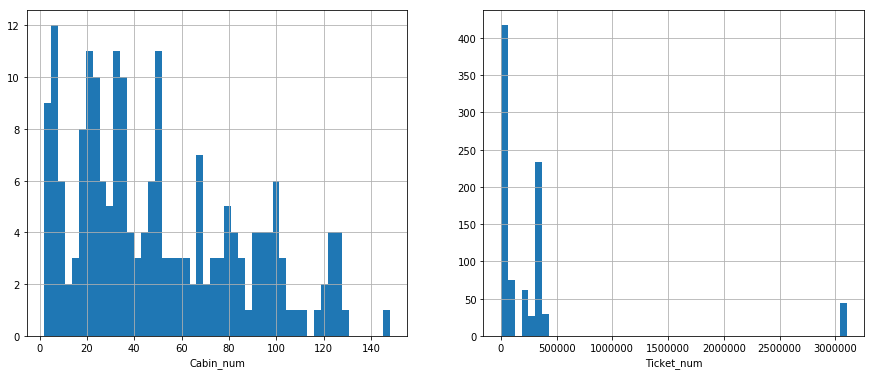

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1 , 2 ,1) 
fig = data.Cabin_numerical.hist(bins = 50)
fig.set_xlabel('Cabin_num')
plt.subplot(1 , 2 , 2)
fig = data.Ticket_numerical.hist(bins = 50)
fig.set_xlabel('Ticket_num')

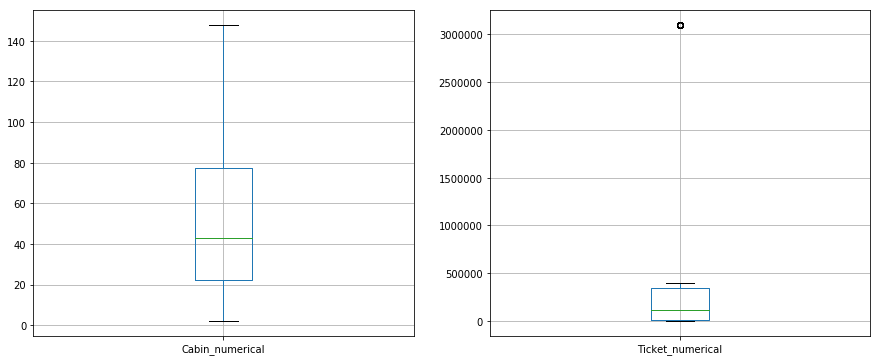

In [24]:
plt.figure(figsize = (15 , 6))
plt.subplot(1 , 2 ,1)
fig = data.boxplot(column = 'Cabin_numerical')

plt.subplot(1 , 2 , 2)
fig = data.boxplot(column = 'Ticket_numerical')

In [25]:
# Ticket numerical
IQR = data.Ticket_numerical.quantile(0.75) - data.Ticket_numerical.quantile(0.25)
Lower_fence = data.Ticket_numerical.quantile(0.25) - (IQR * 3)
Upper_fence = data.Ticket_numerical.quantile(0.75) + (IQR * 3)
print('Ticket number outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Ticket number outliers are values < -981730.0 or > 1343691.0


In [26]:
b = np.where(data.Ticket_numerical > 1343691.0)
print(len(b[0])/np.float(len(data)))

0.0493827160494


In [27]:
data[['Cabin_categorical', 'Ticket_categorical', 'Title']].isnull().mean()


Cabin_categorical     0.771044
Ticket_categorical    0.741863
Title                 0.000000
dtype: float64

In [28]:
# it contains several labels, some of them seem very similar apart from the punctuation
# I will try to reduce this number of labels a bit further
 
# remove non letter characters from string
text = data.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))
 
# to visualise the output and compare with input
pd.concat([text, data.Ticket_categorical], axis=1)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
5,nan,NaN
6,nan,NaN
7,nan,NaN
8,nan,NaN
9,nan,NaN


In [29]:
text = text.str.upper()

In [30]:
# process the variable in submission as well
data['Ticket_categorical'] = text
#data[]

In [31]:
for var in ['Cabin_categorical', 'Ticket_categorical', 'Title']:
    print(var, ' contains ', len(data[var].unique()), ' labels')


('Cabin_categorical', ' contains ', 9, ' labels')
('Ticket_categorical', ' contains ', 28, ' labels')
('Title', ' contains ', 5, ' labels')


In [32]:
for var in ['Cabin_categorical', 'Ticket_categorical', 'Title']:
    print(data[var].value_counts()/len(data))

C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_categorical, dtype: float64
NAN        0.741863
PC         0.067340
CA         0.046016
A          0.031425
STONO      0.020202
SOTONOQ    0.016835
SCPARIS    0.012346
WC         0.011223
SOC        0.006734
FCC        0.005612
C          0.005612
LINE       0.004489
SOPP       0.003367
PP         0.003367
SCAH       0.003367
WEP        0.003367
SOTONO     0.002245
SWPP       0.002245
PPP        0.002245
CASOTON    0.001122
SCA        0.001122
SCOW       0.001122
AS         0.001122
FC         0.001122
FA         0.001122
SP         0.001122
SOP        0.001122
SC         0.001122
Name: Ticket_categorical, dtype: float64
Mr        0.581369
Miss      0.202020
Mrs       0.144781
Master    0.044893
other     0.026936
Name: Title, dtype: float64


In [33]:
# Let's separate into train and test set
 
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((712, 16), (179, 16))

In [34]:
def find_categorical_and_numerical_variables(dataframe):
    cat_vars = [col for col in data.columns if data[col].dtypes == 'O']
    num_vars  = [col for col in data.columns if data[col].dtypes != 'O']
    return cat_vars, num_vars
                 
categorical, numerical = find_categorical_and_numerical_variables(data)

In [35]:
categorical

['Sex',
 'Ticket',
 'Embarked',
 'Cabin_categorical',
 'Ticket_categorical',
 'Title']

In [36]:
numerical = [var for var in numerical if var not in ['Survived','PassengerId']]
numerical

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin_numerical',
 'Ticket_numerical',
 'Family_size']

In [37]:
for col in numerical:
    if(X_train[col].isnull().mean() > 0):
        print(col , X_train[col].isnull().mean())

('Age', 0.19803370786516855)
('Cabin_numerical', 0.776685393258427)
('Ticket_numerical', 0.0056179775280898875)


In [38]:
for df in [X_train , X_test]:
    for var in ['Age' , 'Ticket_numerical']:
        df[var+'_NA'] = np.where(df[var].isnull() , 1 , 0)

In [39]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Ticket_numerical_NA
140,141,0,3,female,NaN,0,2,2678,15.2458,C,NaN,NaN,2678.0,NAN,Mrs,3,1,0
439,440,0,2,male,31.0,0,0,C.A. 18723,10.5000,S,NaN,NaN,18723.0,CA,Mr,1,0,0
817,818,0,2,male,31.0,1,1,S.C./PARIS 2079,37.0042,C,NaN,NaN,2079.0,SCPARIS,Mr,3,0,0
378,379,0,3,male,20.0,0,0,2648,4.0125,C,NaN,NaN,2648.0,NAN,Mr,1,0,0
491,492,0,3,male,21.0,0,0,SOTON/OQ 3101317,7.2500,S,NaN,NaN,3101317.0,SOTONOQ,Mr,1,0,0


In [40]:
meen = X_train.Age.mean()
meen

29.745183887915935

In [41]:
for df in [X_train , X_test]:
    df['Age'].fillna(meen , inplace=True)

In [42]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Ticket_numerical_NA
140,141,0,3,female,29.745184,0,2,2678,15.2458,C,NaN,NaN,2678.0,NAN,Mrs,3,1,0
439,440,0,2,male,31.000000,0,0,C.A. 18723,10.5000,S,NaN,NaN,18723.0,CA,Mr,1,0,0
817,818,0,2,male,31.000000,1,1,S.C./PARIS 2079,37.0042,C,NaN,NaN,2079.0,SCPARIS,Mr,3,0,0
378,379,0,3,male,20.000000,0,0,2648,4.0125,C,NaN,NaN,2648.0,NAN,Mr,1,0,0
491,492,0,3,male,21.000000,0,0,SOTON/OQ 3101317,7.2500,S,NaN,NaN,3101317.0,SOTONOQ,Mr,1,0,0


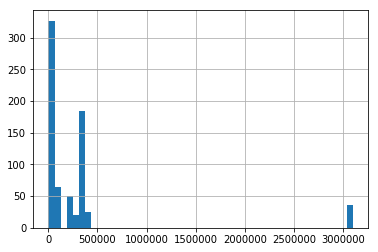

In [43]:
X_train.Ticket_numerical.hist(bins = 50)

In [44]:
median = X_train.Ticket_numerical.median()
median

113053.0

In [45]:
for df in [X_train , X_test]:
    df['Ticket_numerical'].fillna(median , inplace=True)

In [46]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Ticket_numerical_NA
140,141,0,3,female,29.745184,0,2,2678,15.2458,C,NaN,NaN,2678.0,NAN,Mrs,3,1,0
439,440,0,2,male,31.000000,0,0,C.A. 18723,10.5000,S,NaN,NaN,18723.0,CA,Mr,1,0,0
817,818,0,2,male,31.000000,1,1,S.C./PARIS 2079,37.0042,C,NaN,NaN,2079.0,SCPARIS,Mr,3,0,0
378,379,0,3,male,20.000000,0,0,2648,4.0125,C,NaN,NaN,2648.0,NAN,Mr,1,0,0
491,492,0,3,male,21.000000,0,0,SOTON/OQ 3101317,7.2500,S,NaN,NaN,3101317.0,SOTONOQ,Mr,1,0,0


In [47]:
# Cabin numerical
extreme = X_train.Cabin_numerical.mean() + X_train.Cabin_numerical.std()*3
for df in [X_train, X_test]:
    df.Cabin_numerical.fillna(extreme, inplace=True)

In [48]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Ticket_numerical_NA
140,141,0,3,female,29.745184,0,2,2678,15.2458,C,158.222059,NaN,2678.0,NAN,Mrs,3,1,0
439,440,0,2,male,31.000000,0,0,C.A. 18723,10.5000,S,158.222059,NaN,18723.0,CA,Mr,1,0,0
817,818,0,2,male,31.000000,1,1,S.C./PARIS 2079,37.0042,C,158.222059,NaN,2079.0,SCPARIS,Mr,3,0,0
378,379,0,3,male,20.000000,0,0,2648,4.0125,C,158.222059,NaN,2648.0,NAN,Mr,1,0,0
491,492,0,3,male,21.000000,0,0,SOTON/OQ 3101317,7.2500,S,158.222059,NaN,3101317.0,SOTONOQ,Mr,1,0,0


In [49]:
for var in categorical:
    if(X_train[var].isnull().mean() > 0):
        print(var , X_train[var].isnull().mean())

('Embarked', 0.0028089887640449437)
('Cabin_categorical', 0.7710674157303371)


In [50]:
print((X_train['Embarked'].value_counts())/len(X_train))

S    0.726124
C    0.181180
Q    0.089888
Name: Embarked, dtype: float64


In [51]:
for df in [X_train, X_test]:
    df['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
    df['Cabin_categorical'].fillna('Missing', inplace=True)

In [52]:
X_train.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

In [67]:
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])
 
for df in [X_train, X_test]:
    df['Age'] = top_code(df, 'Age', 73)
    df['SibSp'] = top_code(df, 'SibSp', 4)
    df['Parch'] = top_code(df, 'Parch', 2)
    df['Family_size'] = top_code(df, 'Family_size', 7)
    df['Fare'] = top_code(df , 'Fare' , 100)

In [68]:
for var in ['Age',  'SibSp', 'Parch', 'Family_size' , 'Fare']:
    print(var, ' max value: ', X_train[var].max())

('Age', ' max value: ', 73.0)
('SibSp', ' max value: ', 4)
('Parch', ' max value: ', 2)
('Family_size', ' max value: ', 7)
('Fare', ' max value: ', 100.0)


In [55]:
categorical = ['Sex' , 'Embarked' , 'Cabin_categorical' , 'Ticket_categorical' , 'Title']

In [56]:
for var in categorical:
    print(var , X_train[var].value_counts()/len(data))

('Sex', male      0.521886
female    0.277217
Name: Sex, dtype: float64)
('Embarked', S    0.582492
C    0.144781
Q    0.071829
Name: Embarked, dtype: float64)
('Cabin_categorical', Missing    0.616162
C          0.049383
B          0.040404
E          0.032548
D          0.029181
A          0.016835
F          0.010101
G          0.003367
T          0.001122
Name: Cabin_categorical, dtype: float64)
('Ticket_categorical', NAN        0.582492
PC         0.052750
CA         0.040404
A          0.028058
STONO      0.019080
SOTONOQ    0.013468
WC         0.011223
SCPARIS    0.011223
SOC        0.005612
C          0.004489
LINE       0.004489
WEP        0.003367
PP         0.003367
FCC        0.002245
PPP        0.002245
SOTONO     0.002245
SOPP       0.002245
SCAH       0.002245
SCA        0.001122
SCOW       0.001122
AS         0.001122
FC         0.001122
FA         0.001122
SWPP       0.001122
SP         0.001122
Name: Ticket_categorical, dtype: float64)
('Title', Mr        0.471380
Mis

In [57]:
def rare_imputation(variable, which='rare'):    
    temp = X_train[variable].value_counts()/np.float(len(X_train))
    f_cat = [x for x in temp.loc[temp > 0.01].index.values]
    mode_label = X_train[variable].value_counts().sort_values().tail(1).index.values
    if which == 'frequent':
        mode_label = X_train[variable].value_counts().sort_values().tail(1).index.values
        X_train[variable] = np.where(X_train[variable].isin(f_cat) , X_train[variable] , mode_label)
        X_test[variable] = np.where(X_test[variable].isin(f_cat), X_test[variable], mode_label)
    else:
        X_train[variable] = np.where(X_train[variable].isin(f_cat) , X_train[variable] , 'Rare')
        X_test[variable] = np.where(X_test[variable].isin(f_cat), X_test[variable], 'Rare')
        
        
rare_imputation('Cabin_categorical', 'frequent')    
rare_imputation('Ticket_categorical', 'rare')

In [58]:
print X_train['Cabin_categorical'].value_counts()/np.float(len(X_train))
print X_train['Ticket_categorical'].value_counts()/np.float(len(X_train))

Missing    0.776685
C          0.061798
B          0.050562
E          0.040730
D          0.036517
A          0.021067
F          0.012640
Name: Cabin_categorical, dtype: float64
NAN        0.728933
PC         0.066011
CA         0.050562
Rare       0.050562
A          0.035112
STONO      0.023876
SOTONOQ    0.016854
SCPARIS    0.014045
WC         0.014045
Name: Ticket_categorical, dtype: float64


In [59]:
categorical


['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

In [60]:
def encode_categorical_variables(var, target):
       
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()

        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
       
        
        

for var in categorical:
    encode_categorical_variables(var,'Survived')

In [61]:
X_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Ticket_numerical_NA
140,141,0,3,0.744939,29.745184,0,2,2678,15.2458,0.527132,158.222059,0.307414,2678.0,0.394990,0.790000,3,1,0
439,440,0,2,0.191398,31.000000,0,0,C.A. 18723,10.5000,0.342967,158.222059,0.307414,18723.0,0.305556,0.157143,1,0,0
817,818,0,2,0.191398,31.000000,1,1,S.C./PARIS 2079,37.0042,0.527132,158.222059,0.307414,2079.0,0.500000,0.157143,3,0,0
378,379,0,3,0.191398,20.000000,0,0,2648,4.0125,0.527132,158.222059,0.307414,2648.0,0.394990,0.157143,1,0,0
491,492,0,3,0.191398,21.000000,0,0,SOTON/OQ 3101317,7.2500,0.342967,158.222059,0.307414,3101317.0,0.166667,0.157143,1,0,0


In [63]:
data['Ticket_numerical'].head()

0      21171.0
1      17599.0
2    3101282.0
3     113803.0
4     373450.0
Name: Ticket_numerical, dtype: float64

In [96]:
training_vars = [var for var in X_train.columns if var not in ['PassengerId', 'Survived' , 'Ticket']]

X_train[training_vars].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Ticket_numerical_NA
140,3,0.744939,29.745184,0,2,15.2458,0.527132,158.222059,0.307414,2678.0,0.394990,0.790000,3,1,0
439,2,0.191398,31.000000,0,0,10.5000,0.342967,158.222059,0.307414,18723.0,0.305556,0.157143,1,0,0
817,2,0.191398,31.000000,1,1,37.0042,0.527132,158.222059,0.307414,2079.0,0.500000,0.157143,3,0,0
378,3,0.191398,20.000000,0,0,4.0125,0.527132,158.222059,0.307414,2648.0,0.394990,0.157143,1,0,0
491,3,0.191398,21.000000,0,0,7.2500,0.342967,158.222059,0.307414,3101317.0,0.166667,0.157143,1,0,0


In [80]:
#Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)
 
pred = rf_model.predict_proba(X_train[training_vars])
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test[training_vars])
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))


RF train roc-auc: 0.999069647133
RF test roc-auc: 0.917654808959


In [81]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)
 
pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.919543250978
Adaboost test roc-auc: 0.898880105402


In [84]:
#A single decision tree with min sample split as 2
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[training_vars], y_train)
pred = clf.predict_proba(X_train[training_vars])
print('DT train roc-auc: {}'.format(roc_auc_score(+y_train, pred[:,1])))
pred = clf.predict_proba(X_test[training_vars])
print('DT test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

DT train roc-auc: 0.999995828014
DT test roc-auc: 0.747035573123


In [100]:
clf = tree.DecisionTreeClassifier(min_samples_split = 50)
clf = clf.fit(X_train[training_vars], y_train)
pred = clf.predict_proba(X_train[training_vars])
print('DT train roc-auc: {}'.format(roc_auc_score(+y_train, pred[:,1])))
pred = clf.predict_proba(X_test[training_vars])
print('DT test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))


DT train roc-auc: 0.923953040126
DT test roc-auc: 0.874374176548
